In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '../')
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms
from torch.utils.data import DataLoader

from src import *

In [2]:
batch_size = 16
lr = 1e-5
latent_embedding = 512
df = pd.read_csv('../deepfake-detection/dfdc_train_preprocessed_subset/faces_metadata.csv')

In [3]:
print(len(df))

2000


In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

dataset = DFDC_Dataset(df=df, transform=transform, path='../deepfake-detection/dfdc_train_preprocessed_subset/')
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=16)

In [5]:
model = ConvLSTM(num_classes=1, attention=True, encoder='ResNet')
optim_, sched_ = CreateOptim(model.parameters(), lr=1e-5)

In [6]:
losses = []
averages = []
train_dfd(model=model, dataloader=dataloader, optim=optim_, scheduler=sched_, criterion=nn.BCELoss(),
          losses=losses, averages=averages, n_epochs=30, device = 'cuda:1', verbose=False)

0it [00:00,  1.18s/it]                           

0 Average:0.6594 


0it [00:00,  1.17s/it]  

1 Average:0.5880 


0it [00:00,  1.18s/it]  

2 Average:0.5401 


0it [00:00,  1.19s/it]  

3 Average:0.5081 


0it [00:00,  1.17s/it]  

4 Average:0.4689 


0it [00:00,  1.18s/it]  

5 Average:0.4581 


0it [00:00,  1.17s/it]  

6 Average:0.4363 


0it [00:00,  1.18s/it]  

7 Average:0.4186 


0it [00:00,  1.17s/it]  

8 Average:0.4034 


0it [00:00,  1.17s/it]  

9 Average:0.3907 


0it [00:00,  1.17s/it]  

10 Average:0.3871 


0it [00:00,  1.17s/it]  

11 Average:0.3654 


0it [00:00,  1.17s/it]  

12 Average:0.3548 


0it [00:00,  1.18s/it]  

13 Average:0.3438 


0it [00:00,  1.18s/it]  

14 Average:0.3199 


0it [00:00,  1.18s/it]  

15 Average:0.3263 


0it [00:00,  1.18s/it]  

16 Average:0.3076 


11it [00:17,  1.39s/it]

KeyboardInterrupt: 

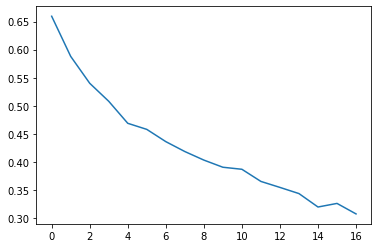

In [7]:
plt.plot(averages)

In [8]:
save_checkpoint(model, '3 fps, 30 frames, 30 epochs', '../checkpoints/resnet152_attn_BCE.pth.tar')